In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

In [2]:
# parent directory
parent_directory = os.path.dirname(os.getcwd())
path = parent_directory + '/Data'

In [3]:
#read the data
data_train = pd.read_csv(path + '/train.csv')
data_test = pd.read_csv(path + '/test.csv')

In [4]:
#check the data
data_train.info(),data_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


(None, (200000, 202))

In [5]:
data_test.info(),data_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


(None, (200000, 201))

In [6]:
data_test.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [ ]:
# DATA IS ALL NUMERICAL

In [7]:
data_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
#check the missing values
data_train.isnull().sum().value_counts()

0    202
dtype: int64

In [10]:
data_test.isnull().sum().value_counts()

0    201
dtype: int64

In [12]:
data_train.duplicated().sum()

0

In [13]:
data_test.duplicated().sum()

0

# EDA

In [14]:
data_X = data_train.drop(['ID_code','target'],axis=1)
data_Y = data_train['target']

In [15]:
# CHECK THE CORRELATION OF FEATURES TO SEE IF THERE IS MULTICOLLINEARITY
corr_matrix = data_X.corr()

In [16]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [17]:
corr_matrix.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786


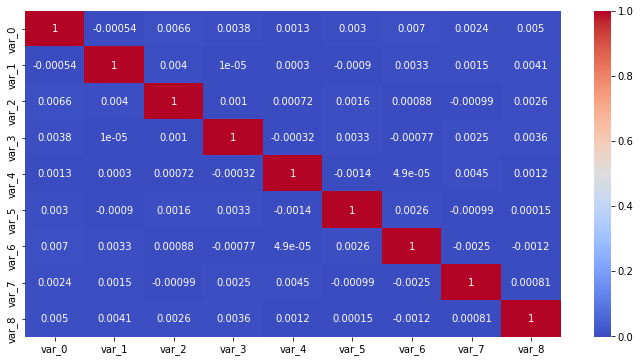

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix.iloc[0:9,0:9],annot=True, cmap='coolwarm')

In [ ]:
# ALMOST NO CORRELATION BETWEEN FEATURES

In [20]:
data_Y.value_counts()

0    179902
1     20098
Name: target, dtype: int64

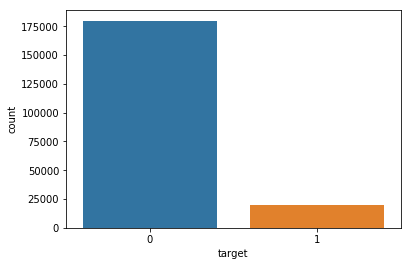

In [21]:
sns.countplot(data_Y)

In [ ]:
#TARGET VALUES ARE IMBALANCED, SO ACCURACY WILL NOT GIVE US REASONABLE RESULT. USING ROC AUC WILL BE BETTER.

In [22]:
data_Xtest=data_test.drop(['ID_code'],axis=1)

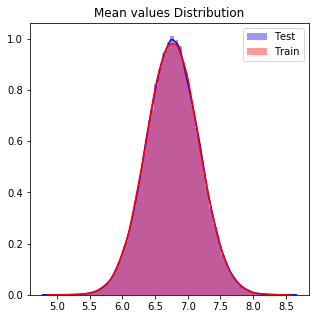

In [24]:
#Compare Mean values distribution of trainig and test set
plt.figure(figsize=[5,5])
plt.title('Mean values Distribution')
sns.distplot(data_Xtest.mean(axis=1),color='blue',bins=120,label='Test')
sns.distplot(data_X.mean(axis=1), color='red',bins=120,label='Train')
plt.legend()
plt.show()

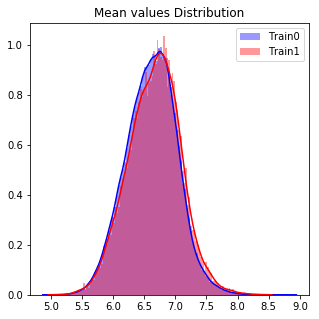

In [25]:
#Compare the mean values distribution of y('0' and '1')
train_0=data_train[data_train['target']==0]
train_1=data_train[data_train['target']==1]

plt.figure(figsize=[5,5])
plt.title('Mean values Distribution')
sns.distplot(train_0.median(axis=1),color='blue',bins=120,label='Train0')
sns.distplot(train_1.median(axis=1), color='red',bins=120,label='Train1')
plt.legend()
plt.show()

In [26]:
len(train_0.mean(axis=1))

179902

In [29]:
# ADD SOME FEATURES USING STATISTICAL VALUES OF DATASET
data_X['mean']=data_X.mean(axis=1)

In [31]:
data_X['std']=data_X.std(axis=1)

In [33]:
data_X['median']=data_X.median(axis=1)

In [34]:
data_X.head(3)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_193,var_194,var_195,var_196,var_197,var_198,var_199,mean,std,median
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,7.281591,9.308182,7.02725
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,7.076818,10.310257,7.22315
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,6.204483,8.731476,6.04820


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(data_X, data_Y, test_size=0.3, random_state=1)

X_test = data_test.drop(['ID_code'], axis=1)

In [39]:
#IMPLEMENT LIGHTGBM
# I PREFER LIGHT GBM CLASSIFIER HERE BECAUSE IT GIVES HIGHER SCORES AND FAST TO IMPLEMENT
import lightgbm as lgb

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
# roc_auc_score(y_validation, prediction)

In [37]:
#USED LIGHT GBM DOCUMENTATION TO CHOOSE PARAMETRS AND  USED GRIDSEARCH FOR PARAMETER TUNING(NOT SHOWN HERE)
params = {'num_leaves': 60,
         'min_data_in_leaf': 70,
         'objective': 'binary',
         'max_depth': 15,
         'learning_rate': 0.01,
         'boosting': 'gbdt',
         'bagging_freq': 5,
         'bagging_fraction': 0.8,
         'feature_fraction': 0.8201,
         'bagging_seed': 11,
         'reg_alpha': 1.728910519108444,
         'reg_lambda': 4.9847051755586085,
         'random_state': 42,
         'metric': 'auc',
         'verbosity': -1,
         'subsample': 0.81,
         'min_gain_to_split': 0.01077313523861969,
         'min_child_weight': 19.428902804238373,
         'num_threads': 4}

In [46]:
train_data=lgb.Dataset(data_X, label=data_Y)
lgbmodel=lgb.train(params,train_data, num_boost_round=20000)

In [47]:
prediction=lgbmodel.predict(data_Xtest)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
roc_auc_score(y_validation, prediction)

0.8937691996743554